# PA 2: Classification - Nearest Neighbors

## Student Details

#Student Name and ID of the member submitting the assignment:

Shivani Manojkumar Panchiwala - 1001982478


#Student Name and ID of the remaining members: 

Kuldip Rameshbhai Savaliya - 1001832000 &

Meghaben Ghanshyambhai Patel - 1002006777

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

## Programming Assignment Details (25 Points)

For this assignment use Jupyter notebook, Panda, and scikit.

 * Load pima-indians-diabetes dataset from sklearn datasets. Output/prediction variable is 'class'[1 points]
 * while selecting best 3 attributes for training,validating and testing your model. [2 points]
 * Find the best K. [3 points]
 * Split your dataset - 60% for training set, 20% for Validation set and 20% for testing set the classifier. Use random state as 2022 [2 points]
 * Use minkowski distance.[1 points]
 * Test the classifier with three different numbers for neighbors and record the results for training, validation and testing. Show the best one.[3 points]
 * Use comments to explain your code and variable names.[4 points]
 * Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers.[6 points]
 * Plot the classifier in a 2D projection.[3 points]

# Load pima-indians-diabetes dataset

In [1]:
#packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("pima-indians-diabetes.csv") # Read the CSV File
df.head() # Get first 5 rows of dataframe
#https://www.shanelynn.ie/python-pandas-read-csv-load-data-from-csv-files/

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Finding missing values of the columns
df.isnull().sum()
#https://note.nkmk.me/en/python-pandas-nan-judge-count/

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Selecting best 3 attributes for training,validating and testing the model

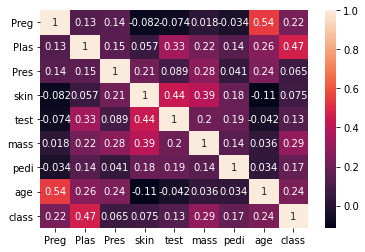

In [6]:
# Correlation Matrix for finding best attributes

sns.heatmap(df.corr(),annot=True)
plt.show()
#https://likegeeks.com/python-correlation-matrix/

In [7]:
## The target variable is 'class'

X = df[['Preg','Plas','Pres','skin','test','mass','pedi','age']]

y = df['class']

#Note: 0 — Non Diabetic Patient and 1 — Diabetic Patient

# Find the best K using UNIVARIATE FEATURE SELECTION

In [8]:
# Univariate Selection for finding best attributes
# UNIVARIATE FEATURE SELECTION

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Apply SelectKBest class to rate attributes
score_func = SelectKBest(score_func=chi2, k='all').fit(X,y)
df_score = pd.DataFrame(score_func.scores_)
df_column = pd.DataFrame(X.columns)
# Concatenating two df_score and df_column to view the scores of corresponding columns 
feature_score = pd.concat([df_column,df_score],axis=1)
feature_score.columns = ['Attributes','Score']
# Print 7 best features
print(feature_score.nlargest(7, 'Score'))
#https://medium.com/@nmscott14/3-feature-selection-methods-e7ccd6dbf316

  Attributes        Score
4       test  2175.565273
1       Plas  1411.887041
7        age   181.303689
5       mass   127.669343
0       Preg   111.519691
3       skin    53.108040
2       Pres    17.605373


In [9]:
# Drop other columns and keep 3 best features columns

attr_drop2 = ['mass', 'Preg', 'skin', 'Pres', 'pedi']
df = df.drop(attr_drop2, axis=1)
X = X.drop(attr_drop2, axis=1)
print(X)
print(y)
#https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe

     Plas  test  age
0     148     0   50
1      85     0   31
2     183     0   32
3      89    94   21
4     137   168   33
..    ...   ...  ...
763   101   180   63
764   122     0   27
765   121   112   30
766   126     0   47
767    93     0   23

[768 rows x 3 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64


# Split dataset - 60% for training set, 20% for Validation set and 20% for testing set the classifier

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2022)
#print(X_train)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=2022)

#https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn

# Another method to choosing a K Value using elbow method

In [11]:
# Finding the Best K with minimum Error Rate
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

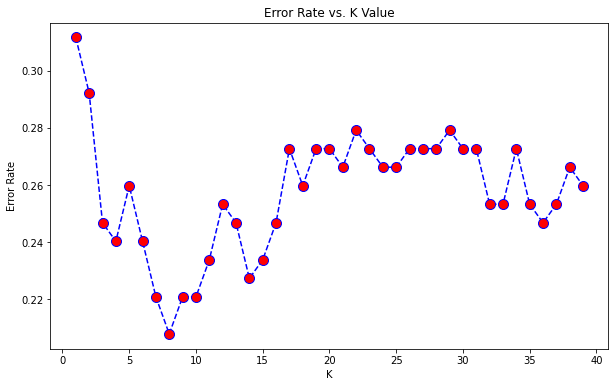

In [12]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
#https://datascienceplus.com/k-nearest-neighbors-knn-with-python/

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=8')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
#https://datascienceplus.com/k-nearest-neighbors-knn-with-python/

WITH K=8


[[104   4]
 [ 28  18]]


              precision    recall  f1-score   support

           0       0.79      0.96      0.87       108
           1       0.82      0.39      0.53        46

    accuracy                           0.79       154
   macro avg       0.80      0.68      0.70       154
weighted avg       0.80      0.79      0.77       154



In [14]:
print("From the graph, the value of K starts increasing from K = 8, which can be designated as the elbow. Hence, K = 8 is the best K-value")

From the graph, the value of K starts increasing from K = 8, which can be designated as the elbow. Hence, K = 8 is the best K-value


# Use minkowski distance
# Test the classifier with three different numbers for neighbors and record the result with confusion Matrix and classification Report.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

knn1 = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski')
knn1.fit(X_train, y_train)
y_pred1 = knn1.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print("Classification Report for K =8\n", classification_report(y_test, y_pred1))
#https://www.ritchieng.com/machine-learning-k-nearest-neighbors-knn/

0.7922077922077922
[[104   4]
 [ 28  18]]
Classification Report for K =8
               precision    recall  f1-score   support

           0       0.79      0.96      0.87       108
           1       0.82      0.39      0.53        46

    accuracy                           0.79       154
   macro avg       0.80      0.68      0.70       154
weighted avg       0.80      0.79      0.77       154



In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn2 = KNeighborsClassifier(n_neighbors = 22, metric = 'minkowski')
knn2.fit(X_train, y_train)
y_pred2 = knn2.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print("Classification Report for K =22\n", classification_report(y_test, y_pred2))
#https://www.ritchieng.com/machine-learning-k-nearest-neighbors-knn/

0.7207792207792207
[[97 11]
 [32 14]]
Classification Report for K =22
               precision    recall  f1-score   support

           0       0.75      0.90      0.82       108
           1       0.56      0.30      0.39        46

    accuracy                           0.72       154
   macro avg       0.66      0.60      0.61       154
weighted avg       0.69      0.72      0.69       154



In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn3 = KNeighborsClassifier(n_neighbors = 35, metric = 'minkowski')
knn3.fit(X_train, y_train)
y_pred3 = knn3.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print("Classification Report for K =35\n", classification_report(y_test, y_pred3))
#https://www.ritchieng.com/machine-learning-k-nearest-neighbors-knn/

0.7467532467532467
[[95 13]
 [26 20]]
Classification Report for K =35
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       108
           1       0.61      0.43      0.51        46

    accuracy                           0.75       154
   macro avg       0.70      0.66      0.67       154
weighted avg       0.73      0.75      0.73       154



# Use minkowski distance
# Test the classifier with three different numbers for neighbors and record the result for the validation with confusion matrix and classification Report.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn4 = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski')
knn4.fit(X_train, y_train)
y_pred4 = knn4.predict(X_val)
print(metrics.accuracy_score(y_val, y_pred4))
print(confusion_matrix(y_val, y_pred4))
print("Classification Report for K =8\n", classification_report(y_val, y_pred4))
#https://www.ritchieng.com/machine-learning-k-nearest-neighbors-knn/

0.7077922077922078
[[77 11]
 [34 32]]
Classification Report for K =8
               precision    recall  f1-score   support

           0       0.69      0.88      0.77        88
           1       0.74      0.48      0.59        66

    accuracy                           0.71       154
   macro avg       0.72      0.68      0.68       154
weighted avg       0.72      0.71      0.69       154



In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn5 = KNeighborsClassifier(n_neighbors = 22, metric = 'minkowski')
knn5.fit(X_train, y_train)
y_pred5 = knn5.predict(X_val)
print(metrics.accuracy_score(y_val, y_pred5))
print(confusion_matrix(y_val, y_pred5))
print("Classification Report for K =22\n", classification_report(y_val, y_pred5))
#https://www.ritchieng.com/machine-learning-k-nearest-neighbors-knn/

0.7532467532467533
[[83  5]
 [33 33]]
Classification Report for K =22
               precision    recall  f1-score   support

           0       0.72      0.94      0.81        88
           1       0.87      0.50      0.63        66

    accuracy                           0.75       154
   macro avg       0.79      0.72      0.72       154
weighted avg       0.78      0.75      0.74       154



In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn6 = KNeighborsClassifier(n_neighbors = 35, metric = 'minkowski')
knn6.fit(X_train, y_train)
y_pred6 = knn6.predict(X_val)
print(metrics.accuracy_score(y_val, y_pred6))
print(confusion_matrix(y_val, y_pred6))
print("Classification Report for K =35\n", classification_report(y_val, y_pred6))
#https://www.ritchieng.com/machine-learning-k-nearest-neighbors-knn/

0.7337662337662337
[[79  9]
 [32 34]]
Classification Report for K =35
               precision    recall  f1-score   support

           0       0.71      0.90      0.79        88
           1       0.79      0.52      0.62        66

    accuracy                           0.73       154
   macro avg       0.75      0.71      0.71       154
weighted avg       0.75      0.73      0.72       154



## Show the best one

#Using minkowski distance, I choosed 3 different k-values which is 8,22,35 and fit for the training and testing and validation.


#Based on the Accuracy, n_neighbors = 8 has 0.7922077922077922 more accuracy which is heighre than other.

# Plot the classifier in a 2D projection.

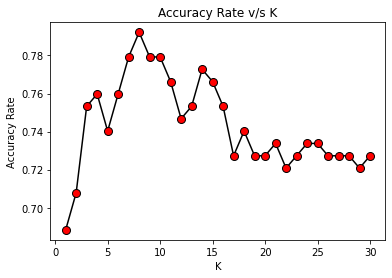

[0.68831169 0.70779221 0.75324675 0.75974026 0.74025974 0.75974026
 0.77922078 0.79220779 0.77922078 0.77922078 0.76623377 0.74675325
 0.75324675 0.77272727 0.76623377 0.75324675 0.72727273 0.74025974
 0.72727273 0.72727273 0.73376623 0.72077922 0.72727273 0.73376623
 0.73376623 0.72727273 0.72727273 0.72727273 0.72077922 0.72727273]


In [21]:
# Plotting K-value against respective accuracy score obtained from classifier corresponding to K = 8

accuracy_rate=np.zeros(30)
for n in range(1,31):
    knn_acc=KNeighborsClassifier(n_neighbors=n)
    knn_acc.fit(X_train,y_train)
    pred_acc = knn_acc.predict(X_test)
    accuracy_rate[n-1]=metrics.accuracy_score(y_test, pred_acc)
    
plt.plot(range(1,31),accuracy_rate,color='black', marker='o', markerfacecolor='red', markersize=8)
plt.title('Accuracy Rate v/s K')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()
print(accuracy_rate)
#https://datascienceplus.com/k-nearest-neighbors-knn-with-python/

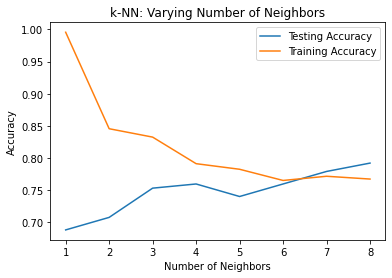

In [22]:
# K value VS Accuracy
no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
#https://www.w3resource.com/machine-learning/scikit-learn/iris/python-machine-learning-k-nearest-neighbors-algorithm-exercise-8.php

C:\Python\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


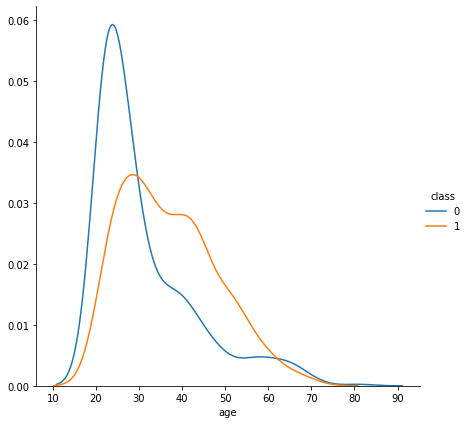

In [23]:
## Distribution density plot KDE (kernel density estimate) between age and class
#Plotting bivariate relations between each pair of features (4 features x4 so 16 graphs)with hue = "class"
sns.FacetGrid(df, hue="class", size=6) \
   .map(sns.kdeplot, "age") \
   .add_legend()
#https://www.kaggle.com/code/grim1412/seaborn-visualization-and-knn-on-the-iris-dataset/notebook

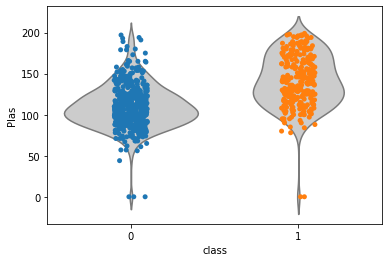

In [24]:
# Scatter and Violin Plot to visualise the class Rate density with respect to Plas

ax = sns.violinplot(x="class", y="Plas", data=df,
                    inner=None, color=".8")
ax = sns.stripplot(x="class", y="Plas", data=df)
#https://seaborn.pydata.org/generated/seaborn.stripplot.html
#https://seaborn.pydata.org/generated/seaborn.violinplot.html

<AxesSubplot:xlabel='class', ylabel='test'>

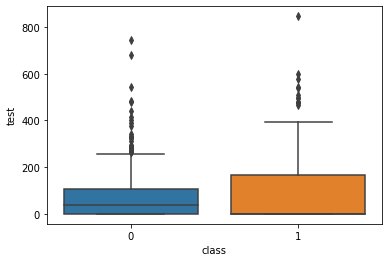

In [25]:
# Boxplot to visualise the class Rate density with respect to test

sns.boxplot(x="class", y="test", data=df)
#https://www.kaggle.com/code/grim1412/seaborn-visualization-and-knn-on-the-iris-dataset/notebook